In [1]:
import sys
sys.path.append('/home/sigurd/dev/ProcessOptimizer')
"""Test skopt plotting with categorical dimensions."""
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from ProcessOptimizer.space import Integer, Categorical
from ProcessOptimizer import plots, gp_minimize

In [2]:
SPACE = [
    Integer(1, 20, name='max_depth'),
    Integer(2, 100, name='min_samples_split'),
    Integer(5, 30, name='min_samples_leaf'),
    Integer(1, 30, name='max_features'),
    Categorical(list('abc'), name='dummy'),
    Categorical(['gini', 'entropy'], name='criterion'),
    Categorical(list('def'), name='dummy'),
]

In [3]:
def objective(params):
    clf = DecisionTreeClassifier(**{dim.name: val for dim, val in zip(SPACE, params) if dim.name != 'dummy'})
    return -np.mean(cross_val_score(clf, *load_breast_cancer(True)))

In [4]:
res = gp_minimize(objective, SPACE, n_calls=20)

/home/sigurd/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/sigurd/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/sigurd/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/sigurd/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of rely

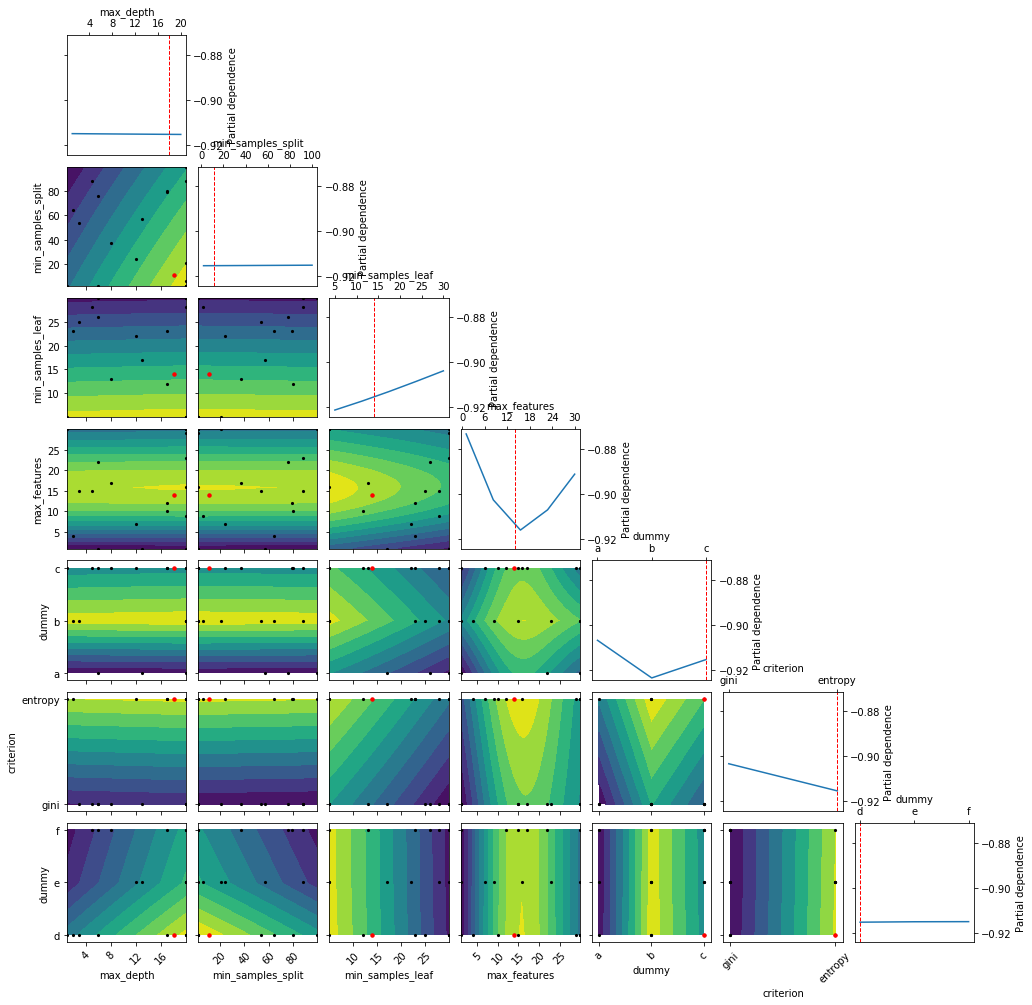

In [5]:
_=plots.plot_objective(res,n_points =5)

In [10]:
res.x

[9, 2, 5, 25, 'b', 'entropy', 'e']

In [6]:
a=res.x


In [7]:
a=[6, 6,6 , 6, 'c', 'entropy', 'f']

In [8]:
_=plots.plot_objective(res,x_vals = a,n_points = 5)

TypeError: plot_objective() got an unexpected keyword argument 'x_vals'

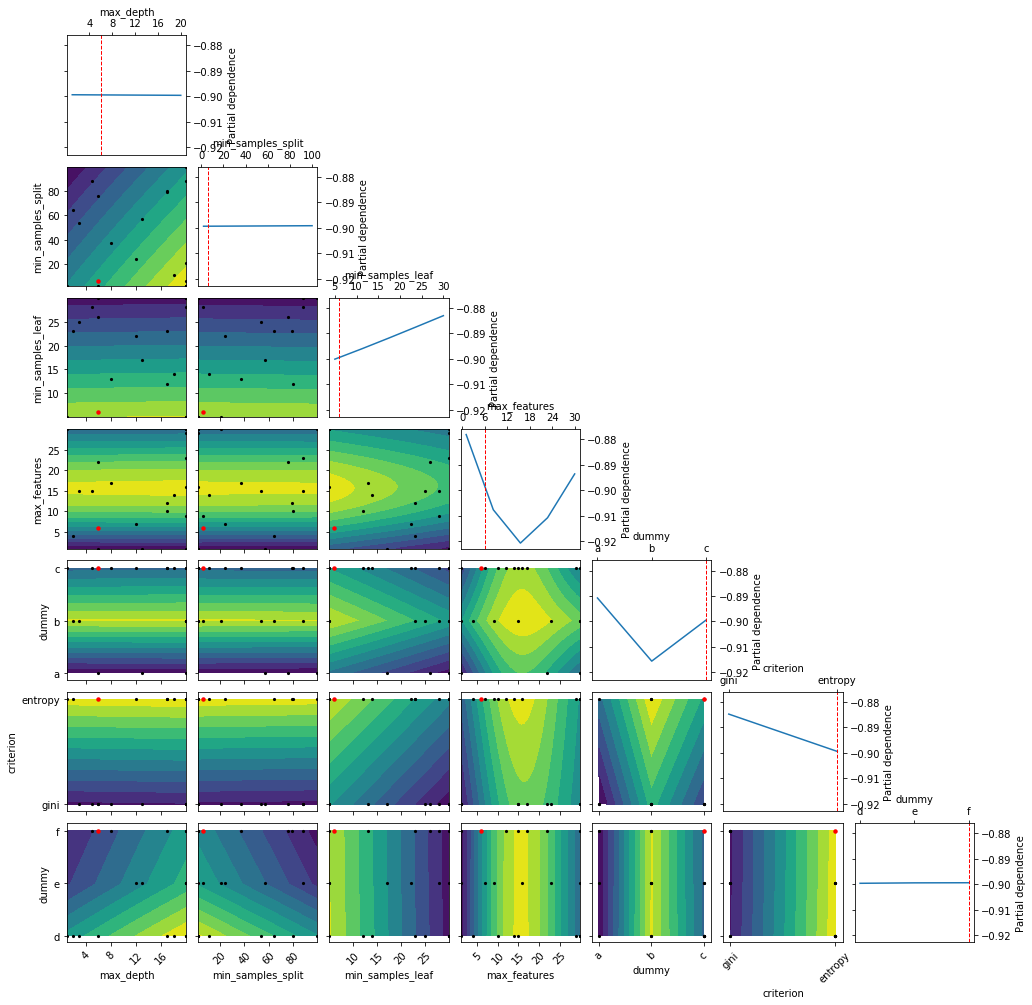

In [12]:
_=plots.plot_objective(res,usepartialdependence=True, pars=a,n_points =5)

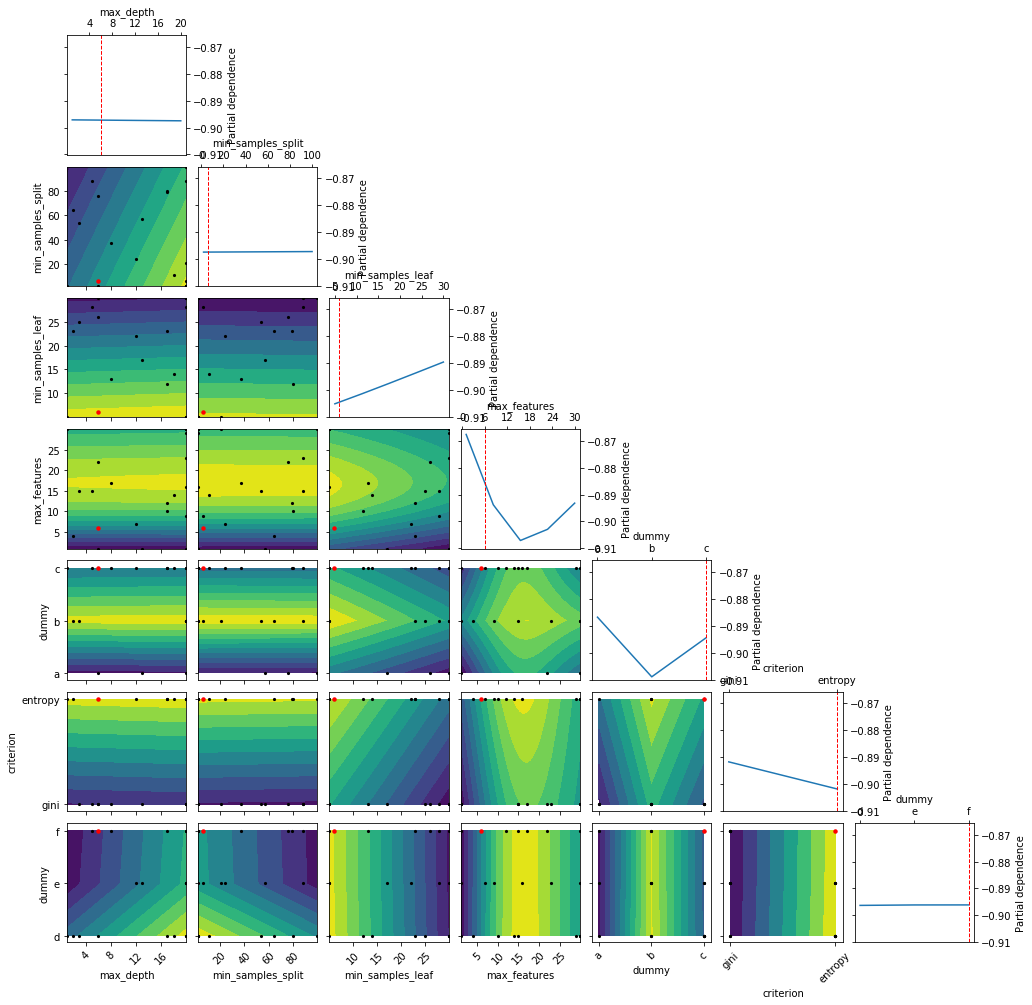

In [11]:
_=plots.plot_objective(res,usepartialdependence=False, pars=a,n_points =5)

In [308]:
n_samples = 250

In [309]:
i=1

In [310]:
model=res.models[-1]

In [311]:
n_points = 40*40

In [331]:
space.transform([res.x])

array([[0.63157895, 0.        , 0.        , 0.27586207, 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [312]:
space = res.space

In [313]:
dim = space.dimensions[i]

In [330]:
space.rvs(n_samples=n_samples)

[[18, 39, 12, 2, 'a', 'gini', 'd'],
 [7, 33, 22, 18, 'b', 'gini', 'f'],
 [4, 40, 6, 27, 'a', 'entropy', 'f'],
 [15, 45, 13, 29, 'b', 'gini', 'f'],
 [8, 6, 6, 19, 'a', 'gini', 'e'],
 [13, 45, 8, 30, 'c', 'gini', 'd'],
 [4, 17, 30, 22, 'a', 'gini', 'e'],
 [12, 80, 11, 28, 'b', 'entropy', 'd'],
 [12, 24, 26, 27, 'a', 'entropy', 'f'],
 [4, 76, 25, 1, 'b', 'entropy', 'd'],
 [7, 89, 25, 14, 'c', 'entropy', 'f'],
 [8, 44, 15, 1, 'c', 'entropy', 'e'],
 [18, 25, 6, 10, 'c', 'entropy', 'e'],
 [4, 89, 22, 10, 'a', 'entropy', 'd'],
 [12, 99, 15, 25, 'c', 'gini', 'f'],
 [13, 95, 9, 25, 'c', 'entropy', 'd'],
 [15, 26, 16, 14, 'c', 'entropy', 'd'],
 [19, 11, 12, 24, 'b', 'gini', 'e'],
 [14, 7, 13, 5, 'a', 'gini', 'd'],
 [16, 10, 30, 28, 'c', 'gini', 'd'],
 [4, 18, 18, 24, 'c', 'gini', 'e'],
 [9, 51, 24, 6, 'a', 'entropy', 'f'],
 [2, 74, 21, 12, 'c', 'entropy', 'e'],
 [11, 76, 5, 21, 'a', 'entropy', 'd'],
 [15, 33, 11, 9, 'a', 'entropy', 'f'],
 [2, 7, 28, 21, 'c', 'gini', 'd'],
 [3, 33, 12, 12, 'c', '

In [332]:
#sample_points = space.transform(space.rvs(n_samples=n_samples))
sample_points = space.transform([res.x])

In [333]:
sample_points

array([[0.63157895, 0.        , 0.        , 0.27586207, 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [334]:
sample_points.shape

(1, 11)

In [335]:
dim_locs = np.cumsum([0] + [d.transformed_size for d in space.dimensions])

In [336]:
dim_locs

array([ 0,  1,  2,  3,  4,  7,  8, 11])

In [337]:
xi, xi_transformed = plots._evenly_sample(space.dimensions[i], n_points)

In [338]:
xi_transformed.shape

(1600,)

In [339]:
xi_transformed

array([0.00000000e+00, 6.25390869e-04, 1.25078174e-03, ...,
       9.98749218e-01, 9.99374609e-01, 1.00000000e+00])

In [340]:
rvs_ = np.array(sample_points)      # copy

In [341]:
# The "original" way to do it
xi, xi_transformed = plots._evenly_sample(space.dimensions[i], n_points)
yi = []
for x_ in xi_transformed:
    rvs_ = np.array(sample_points)      # copy
    rvs_[:, dim_locs[i]:dim_locs[i + 1]] = x_
    yi.append(np.mean(model.predict(rvs_)))

In [346]:
if 1==[]:
    print('yo')

In [344]:
rvs_.shape

(1, 11)

In [323]:
# new way

#xi, xi_transformed = plots._evenly_sample(space.dimensions[i], n_points)
# Here we create one array which we pass into the predict method.
# n_valu
n_values_i = np.size(xi_transformed,0) #Number of values that we test for in our i'th dimension.
# This is normally equal to n_points, but with categorical values this is not always true.

rvs_all_size = [n_samples*n_values_i,np.size(sample_points,1)] # We preallocate an array that can hold
    # all values
rvs_all_ = np.zeros(rvs_all_size)
for i_x in range(n_values_i):
    rvs_ = np.array(sample_points)      # copy
    rvs_[:, dim_locs[i]:dim_locs[i + 1]] = xi_transformed[i_x]
    rvs_all_[i_x*n_samples:(i_x+1)*n_samples,:] = rvs_
y_all = model.predict(rvs_all_)
yi = []
for i_x in range(n_values_i):
    yi.append(np.mean(y_all[i_x*n_samples:(i_x+1)*n_samples]))

In [ ]:
a=[np.mean(b) for b in]

In [199]:
rvs_all_.shape

(4, 11)

In [193]:
a=[1,2,3,4,5,6,7,8]

In [195]:
a[2:4]

[3, 4]

In [153]:
rvs_all_ .shape

(4, 11)

In [160]:
xi, xi_transformed = plots._evenly_sample(space.dimensions[i], n_points)
yi = []
rvs_all = []
for x_ in xi_transformed:
    print(x_)
    rvs_ = np.array(sample_points)      # copy
    rvs_[:, dim_locs[i]:dim_locs[i + 1]] = x_
    rvs_all.append(rvs_)

[1 0 0]
[0 0 1]


In [169]:
a=np.array(rvs_all)

In [170]:
a.shape

(2, 2, 11)

In [177]:
b=np.reshape(a,[-1,11])

In [178]:
b

array([[0.15789474, 0.59183673, 0.72      , 0.34482759, 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.57894737, 0.2244898 , 0.56      , 0.13793103, 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        0.        ],
       [0.15789474, 0.59183673, 0.72      , 0.34482759, 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.57894737, 0.2244898 , 0.56      , 0.13793103, 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        ]])

In [175]:
b.shape

(4, 11)

In [140]:
for x_ in xi_transformed:
    print(x_)
    rvs_ = np.array(sample_points)      # copy
    rvs_[:, dim_locs[i]:dim_locs[i + 1]] = x_
    rvs_all_[]
    #yi.append(np.mean(model.predict(rvs_)))

[1 0 0]
[0 0 1]


In [155]:
a=[]

In [156]:
a.append([1,2,3])

In [157]:
a.append([4,5,6])

In [159]:
np.array(a).shape

(2, 3)

In [154]:
len(xi_transformed)

2

In [148]:
b=np.append(a,[1,2,3])

In [149]:
b

array([1., 2., 3.])

In [150]:
np.append(b,[1,2,3])

array([1., 2., 3., 1., 2., 3.])

In [144]:
np.array(rvs).shape

(2, 2, 11)

In [98]:
np.shape(xi_transformed)

(3, 3)

In [65]:
for x_ in xi_transformed:
    rvs_ = np.array(sample_points)      # copy
    rvs_[:, dim_locs[i]:dim_locs[i + 1]] = x_
    yi.append(np.mean(model.predict(rvs_)))

[-0.8937198918317689, -0.8937135577432885, -0.8936642045747181]

In [95]:
rvs_

array([[0.10526316, 0.79591837, 0.76      , 0.27586207, 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        ],
       [0.36842105, 0.46938776, 0.28      , 0.31034483, 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        ]])

In [91]:
a=[[rvs_] for b in sample_points]

In [94]:
np.shape(a)

(2, 11)

In [58]:
a[2:4]

[3, 4]

In [56]:
rvs_[:, dim_locs[i]:dim_locs[i + 1]]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [31]:
cats = np.array(getattr(dim, 'categories', []), dtype=object)

In [32]:
cats

array(['d', 'e', 'f'], dtype=object)

In [33]:
xi = np.linspace(0, len(cats) - 1, min(len(cats), 7), dtype=int)

In [34]:
xi

array([0, 1, 2])

In [35]:
xi_transformed = dim.transform(cats[xi])

In [37]:
xi_transformed

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
dependence(space, model, i, j=None, sample_points=None,
                       n_samples=250, n_points=40):

In [20]:
space

Space([Integer(low=1, high=20),
       Integer(low=2, high=100),
       Integer(low=5, high=30),
       Integer(low=1, high=30),
       Categorical(categories=('gini', 'entropy'), prior=None),
       Categorical(categories=('a', 'b', 'c', ..., 'h', 'i', 'j'), prior=None)])

In [10]:
space = res.space

In [14]:
rvs_transformed = space.transform(space.rvs(n_samples=120))

In [21]:
rvs_transformed.shape

(120, 15)

In [ ]:
rvs_transformed = space.transform(space.rvs(n_samples=n_samples))
    samples, minimum, _ = _map_categories(space, result.x_iters, result.x)

In [9]:
res.x

[20, 2, 5, 16, 'entropy', 'a']

In [ ]:
plots.plot_evaluations(res)
plots.plot_objective(res)